In [119]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import learning_curve
from matplotlib import pyplot
import numpy as np
import pandas as pd

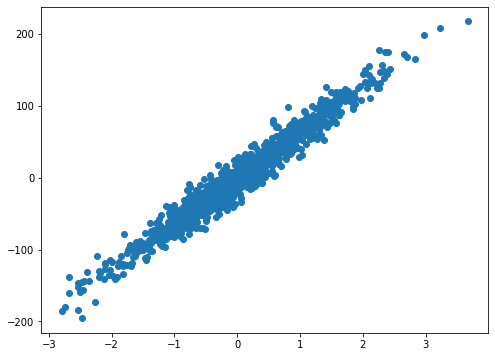

In [120]:
# Generating dataset using make_regression
X1, y1 = make_regression(n_samples=1000, n_features=2, noise=0.3)
X, y = X1[:, 0], y1[:]
pyplot.figure(figsize=(8, 6))
pyplot.scatter(X, y)
pyplot.show()

In [121]:
# Building the model
X_mean = np.mean(X)
y_mean = np.mean(y)

numerator = 0
denominator = 0

for i in range(len(X)):
    numerator += (X[i] - X_mean)*(y[i] - y_mean)
    denominator += (X[i] - X_mean) ** 2

# m and c from y=mx+c
m = numerator/denominator
c = y_mean - m*X_mean

print(m, c)

62.96923101058007 -0.12688492334160895


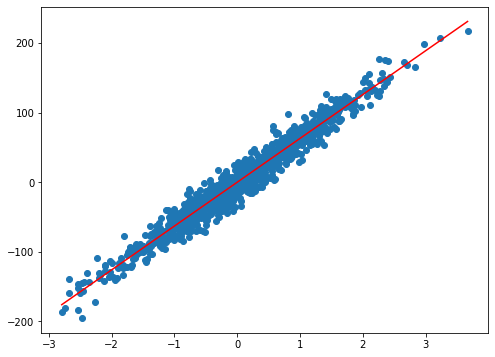

In [122]:
# making predictions
y_pred = m * X + c

pyplot.figure(figsize=(8, 6))
pyplot.scatter(X, y) # original dataset
pyplot.plot([min(X), max(X)], [min(y_pred), max(y_pred)], color='red') # predicted
pyplot.show()

In [123]:
# splitting the training and testing data and calculating the scores using learning_curve()
train_sizes = [1, 10, 50, 100, 300, 700, 800]
features = X1
target = y1
train_sizes, train_scores, test_scores = learning_curve(
estimator=LinearRegression(),
X = features,
y = target,
train_sizes = train_sizes,
cv = 5,
scoring='neg_mean_squared_error'
)
print('Training scores:\n', train_scores)
print('\n\n')
print('Testing scores:\n', test_scores)

Training scores:
 [[-0.         -0.         -0.         -0.         -0.        ]
 [-0.02906773 -0.05457094 -0.05457094 -0.05457094 -0.05457094]
 [-0.0750798  -0.05654587 -0.05654587 -0.05654587 -0.05654587]
 [-0.07518916 -0.06769511 -0.06769511 -0.06769511 -0.06769511]
 [-0.08124121 -0.08146098 -0.08137786 -0.08137786 -0.08137786]
 [-0.08873632 -0.08908025 -0.09052459 -0.08447993 -0.08002983]
 [-0.08796757 -0.08822466 -0.08947439 -0.0839995  -0.0843315 ]]



Testing scores:
 [[-4.46887236e+03 -4.57215151e+03 -4.19461920e+03 -4.39997830e+03
  -4.37753623e+03]
 [-1.20378232e-01 -8.83043211e-02 -8.12255330e-02 -9.72586516e-02
  -1.11481386e-01]
 [-9.28421007e-02 -8.50977770e-02 -7.65205977e-02 -1.01331904e-01
  -9.52790196e-02]
 [-8.80215648e-02 -8.54452272e-02 -7.72598612e-02 -1.03096719e-01
  -9.39824154e-02]
 [-8.36384821e-02 -8.46054320e-02 -7.71643669e-02 -9.72069202e-02
  -9.81792225e-02]
 [-8.32086742e-02 -8.22895759e-02 -7.69209950e-02 -9.86222843e-02
  -9.74201994e-02]
 [-8.29778

In [124]:
# After getting a list of scores for training and testing, calculate mean
train_scores_mean = -train_scores.mean(axis=1)
test_scores_mean = -test_scores.mean(axis = 1)
print('Mean Training scores:\n', pd.Series(train_scores_mean, index = train_sizes))
print('\n')
print('Mean Testing sizes:\n', pd.Series(test_scores_mean, index = train_sizes))

Mean Training scores:
 1     -0.000000
10     0.049470
50     0.060253
100    0.069194
300    0.081367
700    0.086570
800    0.086800
dtype: float64


Mean Testing sizes:
 1      4402.631517
10        0.099730
50        0.090214
100       0.089561
300       0.088159
700       0.087692
800       0.088059
dtype: float64


(0.0, 0.2)

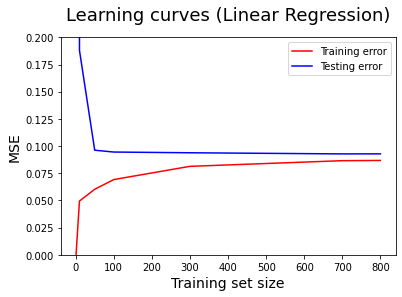

In [125]:
# plotting the learning curve (train and test MSE)
pyplot.plot(train_sizes, train_scores_mean, color='red', label='Training error')
pyplot.plot(train_sizes, validation_scores_mean, color='blue', label='Testing error')
pyplot.ylabel('MSE', fontsize=14)
pyplot.xlabel('Training set size', fontsize=14)
pyplot.title('Learning curves (Linear Regression)', fontsize=18, y=1.05)
pyplot.legend()
pyplot.ylim(0, 0.2)